# Etapa 3: Preparação dos dados 


<br>
Nessa etapa vamos trabalhar os seguintes tópicos:

[1. Visualização dos dados](#s1)


   [- numéricos](#s1a)<br>
   [- categóricos](#s1b)


[2. Tratamento e Limpeza dos dados](#s2)


   [- valores faltantes](#s2a)<br>
   [- normalização](#s2b)<br>
   [- categorização](#s2c)<br>
   [- detecção de outliers](#s2d)<br>



[3. Engenharia de característica (feature engineering)](#s3)


[**Exercício prático**](#s4)

*** 
Material criado por Bruna Franciele Faria, PhD in Computing, Data Science and Engineering.

# A) Importação de bibliotecas

In [1]:
# importando as bibliotecas básicas

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# refs.: 
# https://numpy.org/
# https://seaborn.pydata.org/
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

# B. Carregando os dados

<br>

A tabela de dados utilizada aqui contém as seguintes colunas:

- X1: sexo (f ou m)
- X2: idade em anos
- X3: calorias por dia em kcal
- X4: índice de gordura corporal em porcentagem
- X5: altura em centímetros 
- X6: peso em Kg
- X7: quadril em centímetros 
- X8: atividade física (s ou n) 
- X9: glicemia

Obs.: Essa é uma tabela de dados aleatórios, ou seja, criados apenas para ilustrar o tratamentos dos dados antes de seguir para a EDA.

In [2]:
df = pd.read_csv('exemplo.csv')
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,f,NaN,4502,0.531931,194.569916,91,71.536051,s,NaN
1,f,38.0,2145,0.348537,157.184664,83,65.267795,s,NaN
2,NaN,NaN,1785,0.239461,168.286655,79,86.441186,n,NaN
3,f,74.0,1408,0.231654,160.696907,84,71.251144,n,NaN
4,f,71.0,2428,0.131524,183.369144,91,93.948238,s,NaN
...,...,...,...,...,...,...,...,...,...
995,f,59.0,3349,0.395678,167.743841,206,73.478985,s,NaN
996,m,44.0,4058,0.570401,NaN,142,67.357412,s,NaN
997,f,56.0,1960,0.224747,156.537492,72,71.874759,n,NaN
998,m,NaN,4135,0.577469,160.370829,136,91.683102,s,NaN


**Aqui temos 1000 amostras (linhas) e 9 características (colunas)**

In [3]:
print('Esse dataset possui: {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

Esse dataset possui: 1000 linhas e 9 colunas


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      936 non-null    object 
 1   X2      809 non-null    float64
 2   X3      1000 non-null   int64  
 3   X4      1000 non-null   float64
 4   X5      916 non-null    float64
 5   X6      1000 non-null   int64  
 6   X7      1000 non-null   float64
 7   X8      1000 non-null   object 
 8   X9      19 non-null     float64
dtypes: float64(5), int64(2), object(2)
memory usage: 70.4+ KB


**Quais colunas são numéricas?**

**Quais colunas são categóricas?**

# C) Preparação dos dados

<a id='s1'> <h2> 1. Visualização dos dados </h1></a>


> <a id='s1a'> **Colunas numéricas**</a>

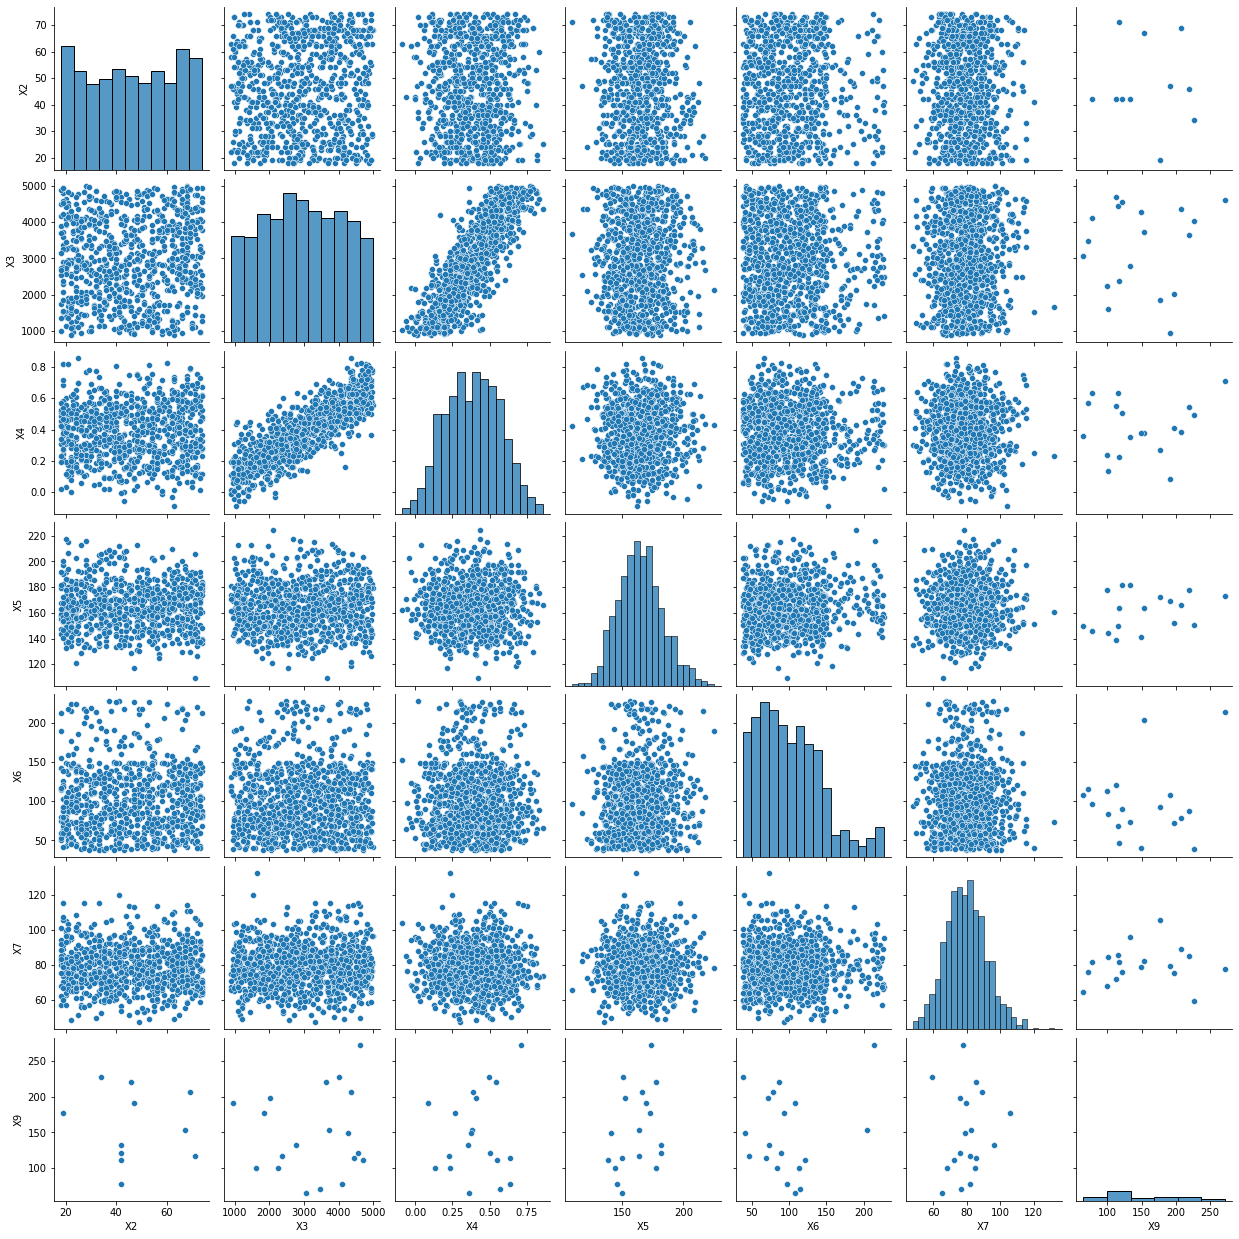

In [5]:
# Este gráfico mostra a relação entre todas as variáveis numéricas

sns.pairplot(df)

# no codigo abaixo os dados são separados de acordo com a coluna X1

#sns.pairplot(df, hue='X1')

<AxesSubplot:>

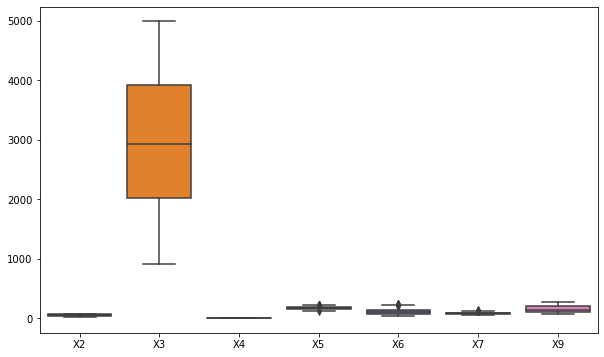

In [6]:
# Agora vamos plotar o boxplot para verificar a dispersão dos valores

plt.figure(figsize=[10,6])
sns.boxplot(data=df)

<AxesSubplot:>

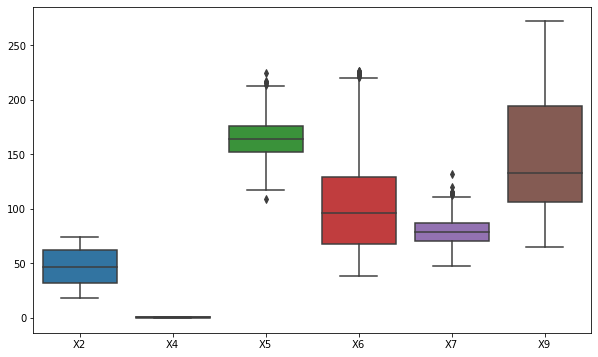

In [7]:
# Vamos remover a coluna X3 para observar melhor as outras colunas

plt.figure(figsize=[10,6])
sns.boxplot(data=df.drop('X3', axis=1))

**O que você observa nos gráficos acima?**

**Alguma coluna possui outliers? Se sim, quais?**

> <a id='s1b'>**Colunas categóricas**</a>

<AxesSubplot:xlabel='X1', ylabel='count'>

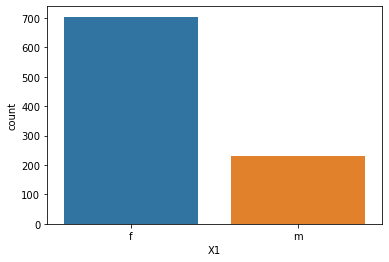

In [8]:
# Util para verificar a quantidade de cada classe

sns.countplot(x='X1', data=df)

In [9]:
df['X1'].value_counts()

f    704
m    232
Name: X1, dtype: int64

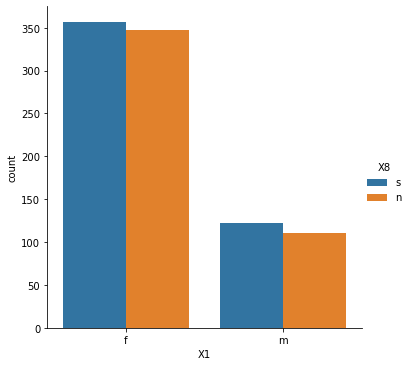

In [10]:
# Quantidade de pessoas que fazem ou não ativ física

sns.catplot(x="X1", hue="X8", kind="count", data=df)

In [11]:
df['X8'].value_counts()

s    517
n    483
Name: X8, dtype: int64

<a id='s2'> <h2> 2. Tratamento e Limpeza dos dados:</h2></a>

- Verificar se existe coluna que pode ser removida;

- Quantificar os dados para ver se a coluna tem valores faltantes;

- Normalizar os dados (quando necessário);

- Transformar os dados categóricos (Encoder);

- Detectar e eliminar outliers.

><a id='s2a'>**A) Valores faltantes**</a>

In [12]:
# retorna o total de valores faltantes presentes em cada coluna

df.isna().sum()

X1     64
X2    191
X3      0
X4      0
X5     84
X6      0
X7      0
X8      0
X9    981
dtype: int64

In [13]:
# retorna a porcentagem de valores faltantes em cada coluna

df.isna().sum()*100/1000

X1     6.4
X2    19.1
X3     0.0
X4     0.0
X5     8.4
X6     0.0
X7     0.0
X8     0.0
X9    98.1
dtype: float64

**O que observamos:**


- Coluna X1 é categórica (sexo) e possui 6.4% dos dados faltantes

- Coluna X2 é numérica (idade) e possui 19.1% dos dados faltantes

- Coluna X5 é numérica (altura) e possui 8.4% dos dados faltantes

- Coluna X9 é numérica (glicemia) e possui 98.1% dos dados faltantes


**Estratégia:**

- para dados categóricos podemos substituir o valor faltante pela a categoria que mais se repete, ou criar uma terceira categoria.

- para dados numéricos podemos substituir o valor faltante pela média dos dados, mediana ou moda.

- se são poucos os valores faltantes, podemos ainda decidir simplesmente exclui-los.

- se são muitos valores faltantes, podemos decidir excluir a coluna.

**Obs.: você pode escolher a estratégia que achar melhor.**

In [14]:
# Tratando a coluna X1

df.X1.value_counts()

f    704
m    232
Name: X1, dtype: int64

> Eu decidi simplesmente excluir as observações que não contem as informações de sexo.

In [15]:
df_clean = df.copy()

df_clean.dropna(subset=['X1'], inplace=True)

df_clean.shape

(936, 9)

In [16]:
df.isna().sum() #*100/1000

X1     64
X2    191
X3      0
X4      0
X5     84
X6      0
X7      0
X8      0
X9    981
dtype: int64

In [17]:
df_clean.isna().sum() #*100/936

X1      0
X2    179
X3      0
X4      0
X5     79
X6      0
X7      0
X8      0
X9    918
dtype: int64

In [18]:
# Tratando a coluna X2

media = df_clean.X2.mean()
print('A media de idade eh de {} anos'.format(int(media)))

A media de idade eh de 46 anos


In [19]:
mediana = df_clean.X2.median()
print('A mediana da idade eh de {} anos'.format(int(mediana)))

A mediana da idade eh de 46 anos


In [20]:
moda = df_clean.X2.mode()
print('A moda da idade eh de {} anos'.format(int(moda)))

A moda da idade eh de 68 anos


<AxesSubplot:xlabel='X2', ylabel='Density'>

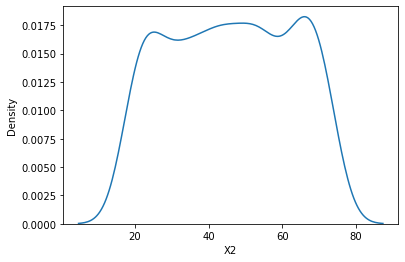

In [21]:
sns.kdeplot(df_clean.X2)

> Eu decidi substituir pela mediana.

In [22]:
df_clean['X2'].fillna(value=mediana, inplace=True)

df_clean.isna().sum() #*100/936

X1      0
X2      0
X3      0
X4      0
X5     79
X6      0
X7      0
X8      0
X9    918
dtype: int64

<AxesSubplot:xlabel='X5', ylabel='Density'>

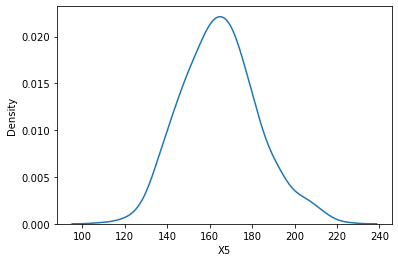

In [23]:
# Tratando a coluna X5

sns.kdeplot(df_clean.X5)

In [24]:
media = df_clean.X5.mean()
mediana = df_clean.X5.median()
moda = df_clean.X5.mode()

print('media =', round(media, 2), 'mediana =', round(mediana, 2))

media = 164.78 mediana = 163.86


> Eu decidi substituir pela media.

In [25]:
df_clean['X5'].fillna(value=media, inplace=True)

df_clean.isna().sum() #*100/936

X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X7      0
X8      0
X9    918
dtype: int64

In [26]:
# Tratando a coluna X9

# Aqui iremos remover ela pois mais de 90% dos dados são faltantes

df_clean = df_clean.drop('X9', axis=1)

df_clean.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
dtype: int64

> <a id='s2b'>**B) Normalização dos dados**</a>


Aplicado para as colunas numéricas!

Algoritmos de ML/DL funcionam melhor com dados normalizados.

Normalização serve para mudar a escala (intervalo) dos valores. 

Existem várias estratégias, mas vamos focar em duas principais:

- Padronização: redimensiona a distribuição dos valores obtendo média igual a 0 e o desvio padrão igual a 1. 


    - Standard Scaler: y = (x – mean) / standard_deviation


- Normalização: redimensiona o intervalo original para que os valores estejam no novo intervalo de 0 e 1. 
    
    
    - MinMax Scaler: y = (x – min) / (max – min)

In [27]:
df_clean.describe()

,X2,X3,X4,X5,X6,X7
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,46.068376,2956.986111,0.386315,164.777717,102.023504,79.484976
std,15.039685,1128.992127,0.181517,17.265669,43.107743,12.301142
min,18.000000,900.000000,-0.090606,109.231432,38.000000,47.831208
25%,35.000000,2024.000000,0.253111,153.298164,68.000000,70.977086
50%,46.000000,2916.000000,0.391389,164.777717,96.000000,79.029565
75%,56.250000,3928.000000,0.518524,174.363553,129.000000,87.565833
max,74.000000,4986.000000,0.857683,224.579746,227.000000,132.267373


**O que nós observamos:**

- a coluna X2 varia de 18 a 74

- a coluna X3 varia de 900 a 4986

- a coluna X4 varia de -0.09 a 0.85

- a coluna X5 varia de 109 a 224

- a coluna X6 varia de 38 a 227

- a coluna X7 varia de 47 a 132

<AxesSubplot:xlabel='X7', ylabel='Count'>

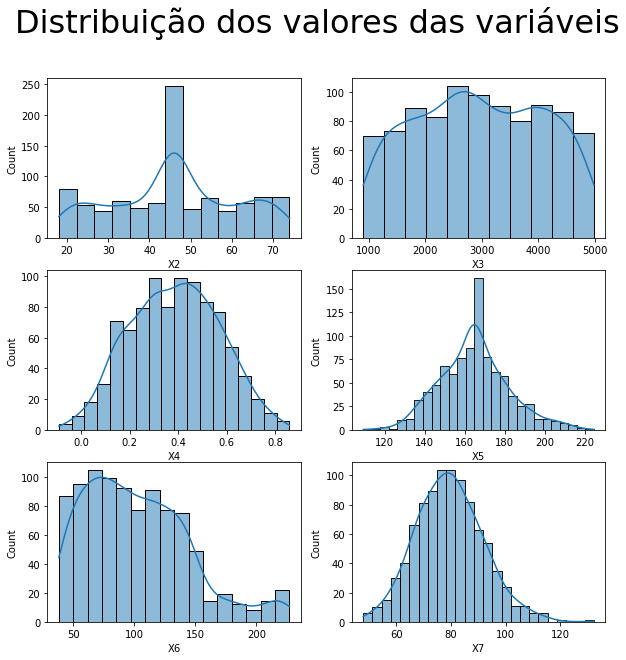

In [28]:
# Vamos observar o histograma das dessas variáveis 

fig, axs = plt.subplots(3, 2, figsize=(10,10))
fig.suptitle('Distribuição dos valores das variáveis', fontsize=32)
sns.histplot(df_clean.X2, kde=True, ax=axs[0,0])
sns.histplot(df_clean.X3, kde=True, ax=axs[0,1])
sns.histplot(df_clean.X4, kde=True, ax=axs[1,0])
sns.histplot(df_clean.X5, kde=True, ax=axs[1,1])
sns.histplot(df_clean.X6, kde=True, ax=axs[2,0])
sns.histplot(df_clean.X7, kde=True, ax=axs[2,1])

<AxesSubplot:xlabel='X7', ylabel='Density'>

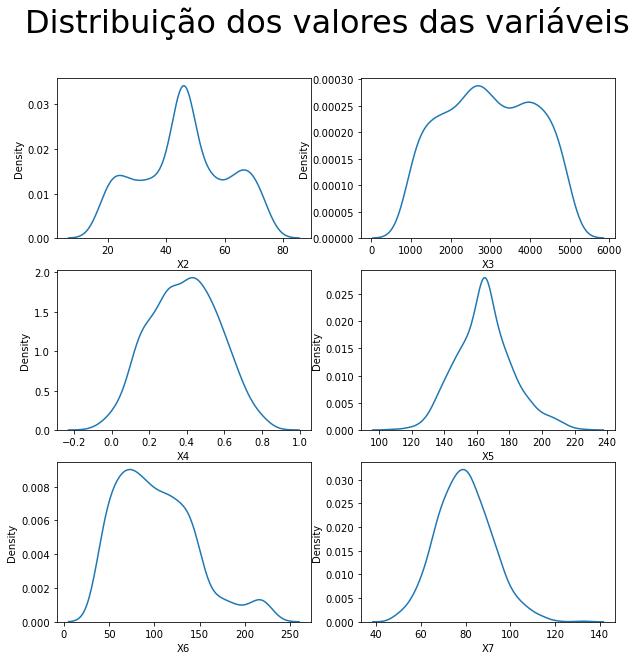

In [29]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))
fig.suptitle('Distribuição dos valores das variáveis', fontsize=32)
sns.kdeplot(df_clean.X2, ax=axs[0,0])
sns.kdeplot(df_clean.X3, ax=axs[0,1])
sns.kdeplot(df_clean.X4, ax=axs[1,0])
sns.kdeplot(df_clean.X5, ax=axs[1,1])
sns.kdeplot(df_clean.X6, ax=axs[2,0])
sns.kdeplot(df_clean.X7, ax=axs[2,1])

X4, X5 e X7 apresentam a forma de uma distribuição normal:

Já as colunas X2, X3 e X6 não seguem o mesmo comportamento.

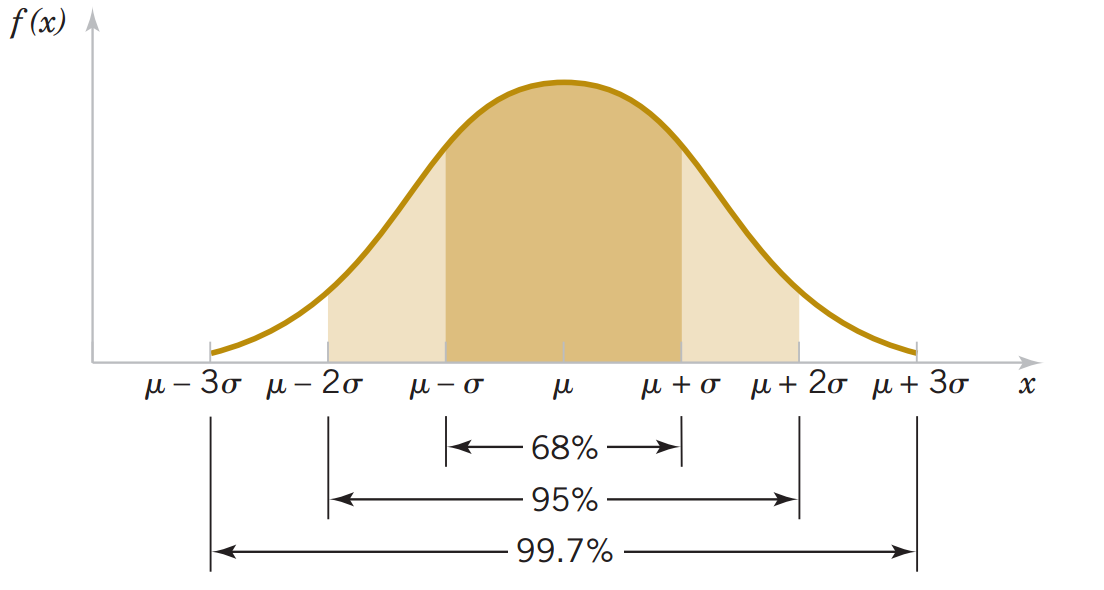

In [30]:
# Bibliotecas para a normalização dos dados

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [31]:
# Aplicando o StandardScaler as colunas com distribuição normal

scaler = StandardScaler()

cols_normalizar = ['X4','X5','X7']

scaled = scaler.fit_transform(df_clean[cols_normalizar])

scaled

array([[ 0.80264558,  1.72643913, -0.6465395 ],
       [-0.20823771, -0.44001267, -1.15637891],
       [-0.8525022 , -0.23648038, -0.66971288],
       ...,
       [-0.89057648, -0.47751585, -0.61899008],
       [ 1.05365671, -0.2553764 ,  0.99215564],
       [ 0.15408537,  0.4075541 ,  0.74895023]])

In [32]:
# Aqui vamos construir um nova df para armazenar nossas variáveis processadas

df_norm = pd.DataFrame(scaled, columns=['X4_norm', 'X5_norm', 'X7_norm'])

df_norm

# ou voce pode simplesmente adicionar as novas colunas ao df_clean
#df_clean[['X4_norm', 'X5_norm', 'X7_norm']] = scaled

,X4_norm,X5_norm,X7_norm
0,0.802646,1.726439e+00,-0.646539
1,-0.208238,-4.400127e-01,-1.156379
2,-0.852502,-2.364804e-01,-0.669713
3,-1.404430,1.077361e+00,1.176394
4,-1.146731,-9.514129e-01,1.559963
...,...,...,...
931,0.051613,1.718850e-01,-0.488508
932,1.014698,1.647020e-15,-0.986416
933,-0.890576,-4.775159e-01,-0.618990
934,1.053657,-2.553764e-01,0.992156


In [33]:
# Aplicando o MinMaxScaler as colunas outras colunas

scaler = MinMaxScaler()

cols_normalizar = ['X2','X3','X6']

scaled = scaler.fit_transform(df_clean[cols_normalizar])

df_norm[['X2_norm', 'X3_norm', 'X6_norm']] = scaled

df_norm

# ou voce pode simplesmente adicionar as novas colunas ao df_clean
#df_clean[['X2_norm', 'X3_norm', 'X6_norm']] = scaled

,X4_norm,X5_norm,X7_norm,X2_norm,X3_norm,X6_norm
0,0.802646,1.726439e+00,-0.646539,0.500000,0.881547,0.280423
1,-0.208238,-4.400127e-01,-1.156379,0.357143,0.304699,0.238095
2,-0.852502,-2.364804e-01,-0.669713,1.000000,0.124327,0.243386
3,-1.404430,1.077361e+00,1.176394,0.946429,0.373960,0.280423
4,-1.146731,-9.514129e-01,1.559963,0.482143,0.194567,0.497354
...,...,...,...,...,...,...
931,0.051613,1.718850e-01,-0.488508,0.732143,0.599364,0.888889
932,1.014698,1.647020e-15,-0.986416,0.464286,0.772883,0.550265
933,-0.890576,-4.775159e-01,-0.618990,0.678571,0.259422,0.179894
934,1.053657,-2.553764e-01,0.992156,0.500000,0.791728,0.518519


<AxesSubplot:xlabel='X7_norm', ylabel='Density'>

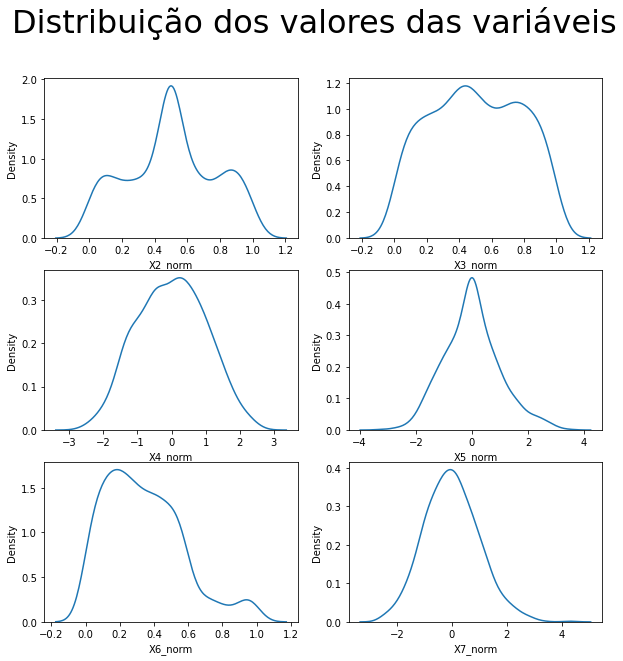

In [34]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))
fig.suptitle('Distribuição dos valores das variáveis', fontsize=32)
sns.kdeplot(df_norm.X2_norm, ax=axs[0,0])
sns.kdeplot(df_norm.X3_norm, ax=axs[0,1])
sns.kdeplot(df_norm.X4_norm, ax=axs[1,0])
sns.kdeplot(df_norm.X5_norm, ax=axs[1,1])
sns.kdeplot(df_norm.X6_norm, ax=axs[2,0])
sns.kdeplot(df_norm.X7_norm, ax=axs[2,1])

> <a id='s2c'>**C) Categorização dos dados**</a>

Aplicado a dados categóricos!

Converte categórico (texto/string) para inteiro.

Duas estratégias principais:

- Label Encoding: assina um número para cada variável em ordem alfabética.


- One Hot Encoding: cria novas colunas de acordo com o número de categorias sendo que cada nova coluna representa uma categoria contendo 0 (falso) ou 1 (verdadeiro)

In [35]:
# Bibliotecas para a categorização dos dados

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      936 non-null    object 
 1   X2      936 non-null    float64
 2   X3      936 non-null    int64  
 3   X4      936 non-null    float64
 4   X5      936 non-null    float64
 5   X6      936 non-null    int64  
 6   X7      936 non-null    float64
 7   X8      936 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 65.8+ KB


In [37]:
df_clean.X1.unique()

array(['f', 'm'], dtype=object)

In [38]:
df_clean.X8.unique()

array(['s', 'n'], dtype=object)

In [39]:
# Aplicando o LabelEncoder

encoder = LabelEncoder()

encoded = encoder.fit_transform(df_clean.X1)

df_norm['X1_f0m1'] = encoded

df_norm

,X4_norm,X5_norm,X7_norm,X2_norm,X3_norm,X6_norm,X1_f0m1
0,0.802646,1.726439e+00,-0.646539,0.500000,0.881547,0.280423,0
1,-0.208238,-4.400127e-01,-1.156379,0.357143,0.304699,0.238095,0
2,-0.852502,-2.364804e-01,-0.669713,1.000000,0.124327,0.243386,0
3,-1.404430,1.077361e+00,1.176394,0.946429,0.373960,0.280423,0
4,-1.146731,-9.514129e-01,1.559963,0.482143,0.194567,0.497354,0
...,...,...,...,...,...,...,...
931,0.051613,1.718850e-01,-0.488508,0.732143,0.599364,0.888889,0
932,1.014698,1.647020e-15,-0.986416,0.464286,0.772883,0.550265,1
933,-0.890576,-4.775159e-01,-0.618990,0.678571,0.259422,0.179894,0
934,1.053657,-2.553764e-01,0.992156,0.500000,0.791728,0.518519,1


In [40]:
# Aplicando o OHE

encoder = OneHotEncoder()

encoded = encoder.fit_transform(df_clean['X8'].values.reshape(-1, 1)).toarray()

df_norm[['X8_s0', 'X8_n1']] = encoded

df_norm

,X4_norm,X5_norm,X7_norm,X2_norm,X3_norm,X6_norm,X1_f0m1,X8_s0,X8_n1
0,0.802646,1.726439e+00,-0.646539,0.500000,0.881547,0.280423,0,0.0,1.0
1,-0.208238,-4.400127e-01,-1.156379,0.357143,0.304699,0.238095,0,0.0,1.0
2,-0.852502,-2.364804e-01,-0.669713,1.000000,0.124327,0.243386,0,1.0,0.0
3,-1.404430,1.077361e+00,1.176394,0.946429,0.373960,0.280423,0,0.0,1.0
4,-1.146731,-9.514129e-01,1.559963,0.482143,0.194567,0.497354,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
931,0.051613,1.718850e-01,-0.488508,0.732143,0.599364,0.888889,0,0.0,1.0
932,1.014698,1.647020e-15,-0.986416,0.464286,0.772883,0.550265,1,0.0,1.0
933,-0.890576,-4.775159e-01,-0.618990,0.678571,0.259422,0.179894,0,1.0,0.0
934,1.053657,-2.553764e-01,0.992156,0.500000,0.791728,0.518519,1,0.0,1.0


> <a id='s2d'> **D) Detecção e tratamento de outliers**</a>


Outliers são pontos discrepantes. 

Considere o seguinte exemplo:

a = [2, 15, 16, 14, 13, 25]

ordem = 2, 13, 14, 15, 16, 25

mediana = 14+15 / 2 = 14.5

media = 2+13+14+15+16+25 / 6 ~= 64

**Quais problemas você consegue perceber se não identificar e remover os outliers?**


Duas estratégias principais:

- Usando boxplot: ele resume os dados de acordo apresentando os quartis, mediana e os outliers.

- Usando o z-score: o score padrão ajuda a entender quão distante está o valor da média. Então definindo um limiar é possível identificar os outliers

        - Zscore = (data_point - mean) / std. deviation

<AxesSubplot:>

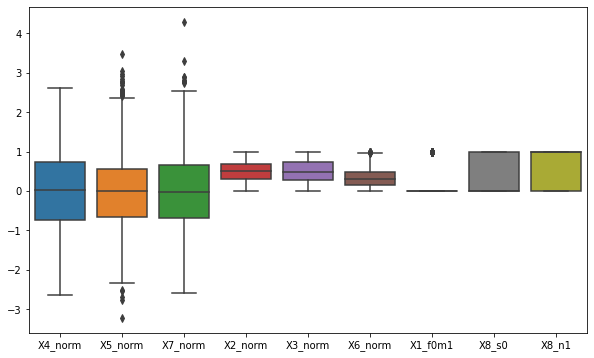

In [41]:
# Usando o boxplot

plt.figure(figsize=[10,6])
sns.boxplot(data=df_norm)

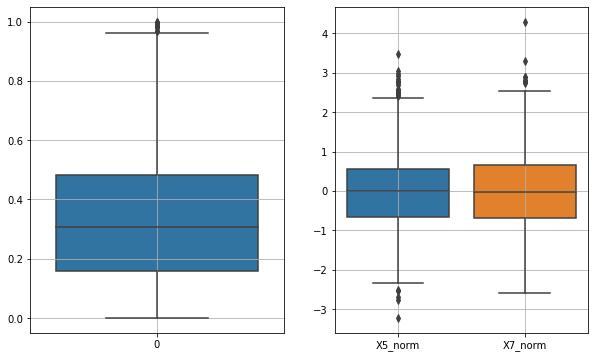

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))
sns.boxplot(data=df_norm['X6_norm'], ax=axs[0])
sns.boxplot(data=df_norm[['X5_norm','X7_norm']], ax=axs[1])
axs[0].grid()
axs[1].grid()

In [43]:
# Identificando os outliers da coluna X6_norm
# Quais linhas representam outliers?

np.where(df_norm.X6_norm > 0.965)

(array([ 54,  98, 273, 447, 457, 479, 537, 657, 681, 730, 778, 892],
       dtype=int64),)

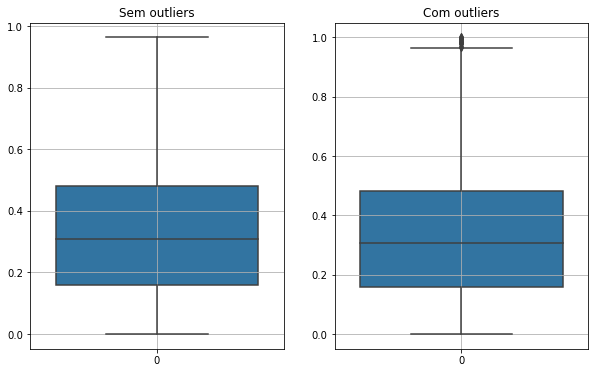

In [44]:
# Para remover:

index = [54, 98, 273, 447, 457, 479, 537, 657, 681, 730, 778, 892]

# Verificando a remoção

fig, axs = plt.subplots(1, 2, figsize=(10,6))

sns.boxplot(data=df_norm['X6_norm'].drop(index), ax=axs[0])
axs[0].set_title('Sem outliers')
axs[0].grid()

sns.boxplot(data=df_norm['X6_norm'], ax=axs[1])
axs[1].set_title('Com outliers')
axs[1].grid()

In [45]:
print('Shape original: ', df_norm.shape)

df_norm.drop(labels=index, inplace=True)
df_norm.reset_index(inplace=True)

print('Novo shape: ', df_norm.shape)

Shape original:  (936, 9)
Novo shape:  (924, 10)


In [46]:
# Usando o Z-score

from scipy.stats import zscore
 
z = np.abs(zscore(df_norm['X5_norm']))

threshold = 2.3

np.where(z > threshold)

(array([ 29,  57, 145, 147, 169, 196, 237, 280, 323, 346, 364, 388, 415,
        422, 455, 489, 549, 572, 601, 659, 682, 704, 742, 747, 759, 825,
        827, 857], dtype=int64),)

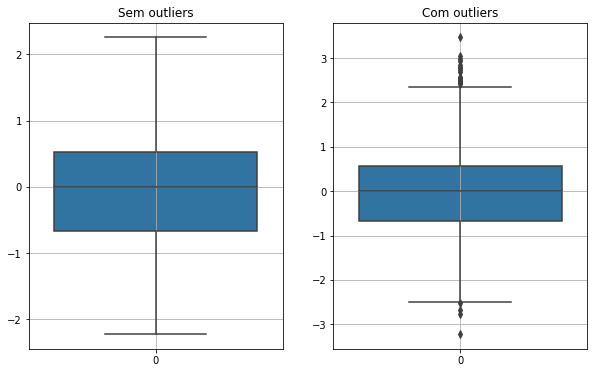

In [47]:
index = [29, 57, 145, 147, 169, 196, 237, 280, 323, 346, 364, 388, 415,
        422, 455, 489, 549, 572, 601, 659, 682, 704, 742, 747, 759, 825, 
        827, 857]

# Verificando a remoção

fig, axs = plt.subplots(1, 2, figsize=(10,6))

sns.boxplot(data=df_norm['X5_norm'].drop(index), ax=axs[0])
axs[0].set_title('Sem outliers')
axs[0].grid()

sns.boxplot(data=df_norm['X5_norm'], ax=axs[1])
axs[1].set_title('Com outliers')
axs[1].grid()

In [48]:
print('Shape original: ', df_norm.shape)

df_norm.drop(labels=index, inplace=True)
df_norm.reset_index(inplace=True)

print('Novo shape: ', df_norm.shape)

Shape original:  (924, 10)
Novo shape:  (896, 11)


In [49]:
z = np.abs(zscore(df_norm['X7_norm']))

threshold = 2.7

np.where(z > threshold)

(array([ 85, 116, 300, 332, 335, 382, 764, 866], dtype=int64),)

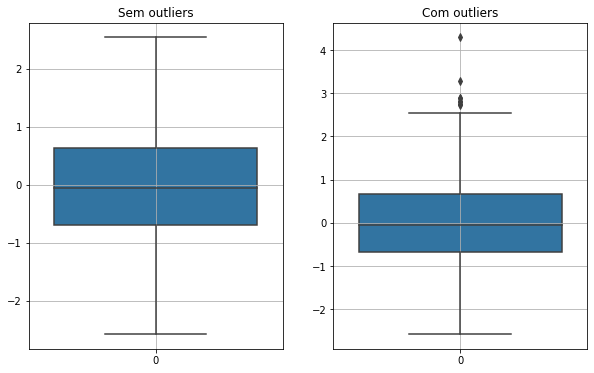

In [50]:
index = [85, 116, 300, 332, 335, 382, 764, 866]

# Verificando a remoção

fig, axs = plt.subplots(1, 2, figsize=(10,6))

sns.boxplot(data=df_norm['X7_norm'].drop(index), ax=axs[0])
axs[0].set_title('Sem outliers')
axs[0].grid()

sns.boxplot(data=df_norm['X7_norm'], ax=axs[1])
axs[1].set_title('Com outliers')
axs[1].grid()

In [51]:
print('Shape original: ', df_norm.shape)

df_norm.drop(labels=index, inplace=True)
df_norm.reset_index(drop=True, inplace=True)

print('Novo shape: ', df_norm.shape)

Shape original:  (896, 11)
Novo shape:  (888, 11)


In [52]:
df_norm

,level_0,index,X4_norm,X5_norm,X7_norm,X2_norm,X3_norm,X6_norm,X1_f0m1,X8_s0,X8_n1
0,0,0,0.802646,1.726439e+00,-0.646539,0.500000,0.881547,0.280423,0,0.0,1.0
1,1,1,-0.208238,-4.400127e-01,-1.156379,0.357143,0.304699,0.238095,0,0.0,1.0
2,2,2,-0.852502,-2.364804e-01,-0.669713,1.000000,0.124327,0.243386,0,1.0,0.0
3,3,3,-1.404430,1.077361e+00,1.176394,0.946429,0.373960,0.280423,0,0.0,1.0
4,4,4,-1.146731,-9.514129e-01,1.559963,0.482143,0.194567,0.497354,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
883,919,931,0.051613,1.718850e-01,-0.488508,0.732143,0.599364,0.888889,0,0.0,1.0
884,920,932,1.014698,1.647020e-15,-0.986416,0.464286,0.772883,0.550265,1,0.0,1.0
885,921,933,-0.890576,-4.775159e-01,-0.618990,0.678571,0.259422,0.179894,0,1.0,0.0
886,922,934,1.053657,-2.553764e-01,0.992156,0.500000,0.791728,0.518519,1,0.0,1.0


<a id='s3'> <h2> 3) Engenharia de características</h2></a>

<br>

**Baseado nas características existentes o que poderíamos criar??**

- O índice de massa corporal (IMC) é baseado no peso e altura.


- O índice de adiposidade corporal (IAC) é baseado na circunferência do quadril e altura.


- Baseado nesses dois valores podemos classificar nossas amostras.


- Nesse exemplo podemos criar mais duas características numéricas e duas características categóricas!


**Obs.: após a criação das novas colunas precisamos retornar e trata-las - normalização/padronização e categorização.**

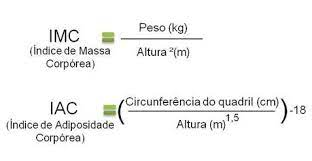
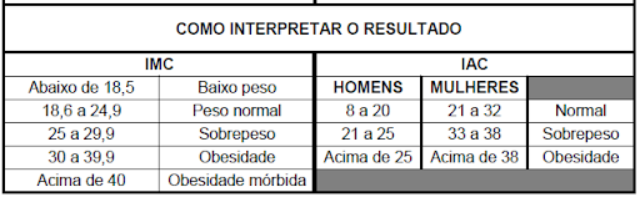

- X5: altura em centímetros
- X6: peso em Kg
- X7: quadril em centímetros

In [53]:
# Criando as variáveis (caraterísticas) IMC e IAC

df_clean['IMC'] = df_clean['X6'].values / ((df_clean['X5'].values)/100)**2

df_clean['IAC'] = df_clean['X7'] / (df_clean['X5']/100)**1.5

df_clean

,X1,X2,X3,X4,X5,X6,X7,X8,IMC,IAC
0,f,46.0,4502,0.531931,194.569916,91,71.536051,s,24.037539,26.357937
1,f,38.0,2145,0.348537,157.184664,83,65.267795,s,33.593693,33.119493
3,f,74.0,1408,0.231654,160.696907,84,71.251144,n,32.528516,34.976839
4,f,71.0,2428,0.131524,183.369144,91,93.948238,s,27.063806,37.835480
5,f,45.0,1695,0.178276,148.359714,132,98.664043,n,59.971092,54.599030
...,...,...,...,...,...,...,...,...,...,...
995,f,59.0,3349,0.395678,167.743841,206,73.478985,s,73.210615,33.821532
996,m,44.0,4058,0.570401,164.777717,142,67.357412,s,52.298758,31.844737
997,f,56.0,1960,0.224747,156.537492,72,71.874759,n,29.382974,36.698545
998,m,46.0,4135,0.577469,160.370829,136,91.683102,s,52.879600,45.144125


In [54]:
# Criando a variável (caraterística) categórica Peso relacionada ao IMC

condicoes = [(df_clean['IMC'] <= 18.5), 
             (18.5 < df_clean['IMC']) & (df_clean['IMC'] <= 24.9), 
             (24.9 < df_clean['IMC']) & (df_clean['IMC'] <= 29.9), 
             (29.9 < df_clean['IMC']) & (df_clean['IMC'] <= 39.9),
             (df_clean['IMC'] >= 40)]

valores = ['baixo','normal','sobrepeso','obeso','obmorbida']

df_clean['Peso'] = np.select(condicoes, valores)

df_clean

,X1,X2,X3,X4,X5,X6,X7,X8,IMC,IAC,Peso
0,f,46.0,4502,0.531931,194.569916,91,71.536051,s,24.037539,26.357937,normal
1,f,38.0,2145,0.348537,157.184664,83,65.267795,s,33.593693,33.119493,obeso
3,f,74.0,1408,0.231654,160.696907,84,71.251144,n,32.528516,34.976839,obeso
4,f,71.0,2428,0.131524,183.369144,91,93.948238,s,27.063806,37.835480,sobrepeso
5,f,45.0,1695,0.178276,148.359714,132,98.664043,n,59.971092,54.599030,obmorbida
...,...,...,...,...,...,...,...,...,...,...,...
995,f,59.0,3349,0.395678,167.743841,206,73.478985,s,73.210615,33.821532,obmorbida
996,m,44.0,4058,0.570401,164.777717,142,67.357412,s,52.298758,31.844737,obmorbida
997,f,56.0,1960,0.224747,156.537492,72,71.874759,n,29.382974,36.698545,sobrepeso
998,m,46.0,4135,0.577469,160.370829,136,91.683102,s,52.879600,45.144125,obmorbida


In [57]:
# Vendo as categorias presentes na variável Peso

df_clean.Peso.unique()

array(['normal', 'obeso', 'sobrepeso', 'obmorbida', 'baixo'], dtype=object)

In [58]:
# Criando a variável (caraterística) categórica Gordura relacionada ao IAC

condicoes = [(df_clean['X1'] == 'f') & (df_clean['IAC'] >= 21) & (df_clean['IAC'] <= 32), 
             (df_clean['X1'] == 'f') & (df_clean['IAC'] >= 33) & (df_clean['IAC'] <= 38), 
             (df_clean['X1'] == 'f') & (df_clean['IAC'] > 38),
             (df_clean['X1'] == 'm') & (df_clean['IAC'] >= 8) & (df_clean['IAC'] <= 20), 
             (df_clean['X1'] == 'm') & (df_clean['IAC'] >= 21) & (df_clean['IAC'] <= 25), 
             (df_clean['X1'] == 'm') & (df_clean['IAC'] > 25)]

valores = ['normal','sobrepeso','obeso','normal','sobrepeso','obeso']

df_clean['Gordura'] = np.select(condicoes, valores)

df_clean

,X1,X2,X3,X4,X5,X6,X7,X8,IMC,IAC,Peso,Gordura
0,f,46.0,4502,0.531931,194.569916,91,71.536051,s,24.037539,26.357937,normal,normal
1,f,38.0,2145,0.348537,157.184664,83,65.267795,s,33.593693,33.119493,obeso,sobrepeso
3,f,74.0,1408,0.231654,160.696907,84,71.251144,n,32.528516,34.976839,obeso,sobrepeso
4,f,71.0,2428,0.131524,183.369144,91,93.948238,s,27.063806,37.835480,sobrepeso,sobrepeso
5,f,45.0,1695,0.178276,148.359714,132,98.664043,n,59.971092,54.599030,obmorbida,obeso
...,...,...,...,...,...,...,...,...,...,...,...,...
995,f,59.0,3349,0.395678,167.743841,206,73.478985,s,73.210615,33.821532,obmorbida,sobrepeso
996,m,44.0,4058,0.570401,164.777717,142,67.357412,s,52.298758,31.844737,obmorbida,obeso
997,f,56.0,1960,0.224747,156.537492,72,71.874759,n,29.382974,36.698545,sobrepeso,sobrepeso
998,m,46.0,4135,0.577469,160.370829,136,91.683102,s,52.879600,45.144125,obmorbida,obeso


In [59]:
# Vendo as categorias presentes na variável Gordura

df_clean.Gordura.unique()

array(['normal', 'sobrepeso', 'obeso', '0'], dtype=object)

<a id='s4'> <h1> EXERCÍCIO PRÁTICO: </h1></a>

<br>

**AGORA É A SUA VEZ!! USE TODO CONHECIMENTO ADQUIRIDO ATÉ AQUI PARA TRABALHAR NO SEU PRÓPRIO PROJETO**